In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data/house_sales.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data = data.drop('Id', 1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Удаление колонок с высоким процентом пропусков (более 25%)
data.dropna(axis=1, thresh=1095)

In [6]:
# Заполним пропуски средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'LotFrontage', data['LotFrontage'].mean())

In [7]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
def obj_col(column): 
    return column[1] == 'object'

col_names = []
for col in list(filter(obj_col, list(zip(list(data.columns), list(data.dtypes))))):
  col_names.append(col[0])
col_names.append('SalePrice')

In [9]:
X_ALL = data.drop(col_names, axis=1)

In [10]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [11]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((1168, 36), (292, 36))

## StandardScaler

In [12]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [13]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

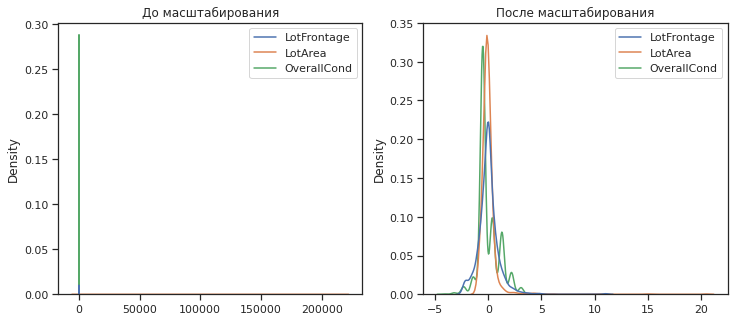

In [14]:
draw_kde(['LotFrontage', 'LotArea', 'OverallCond'], data, data_cs11_scaled, 'До масштабирования', 'После масштабирования')

## Масштабирование "Mean Normalisation"

In [15]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['SalePrice'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((1168, 36), (292, 36))

In [16]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [17]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.000962,-0.000452,-0.000119,-0.003900,-0.003058,-0.003544,-0.008644,-0.000898,-0.001612,0.001276,...,-0.000804,-0.000560,-0.001199,-0.001448,-0.000481,-0.002194,0.000461,-0.000417,0.002802,-0.001969
std,0.248827,0.075425,0.046653,0.153666,0.158971,0.218862,0.344090,0.113166,0.080811,0.109443,...,0.150779,0.170297,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024
min,-0.216081,-0.168431,-0.043200,-0.570491,-0.656678,-0.722876,-0.589740,-0.065702,-0.080216,-0.030304,...,-0.334359,-0.128610,-0.086501,-0.041220,-0.007193,-0.033571,-0.003277,-0.003222,-0.481009,-0.455908
25%,-0.216081,-0.034869,-0.013970,-0.126046,-0.085250,-0.128673,-0.306407,-0.065702,-0.080216,-0.030304,...,-0.098463,-0.128610,-0.086501,-0.041220,-0.007193,-0.033571,-0.003277,-0.003222,-0.117372,-0.205908
50%,-0.039610,-0.000452,-0.004973,-0.014935,-0.085250,0.009008,0.143593,-0.065702,-0.012267,-0.030304,...,0.004146,-0.128610,-0.040797,-0.041220,-0.007193,-0.033571,-0.003277,-0.003222,-0.026463,0.044092
75%,0.078037,0.030199,0.004951,0.096176,0.057608,0.204661,0.310260,0.038048,0.045980,-0.030304,...,0.071847,0.099651,0.037814,-0.041220,-0.007193,-0.033571,-0.003277,-0.003222,0.155355,0.294092
max,0.783919,0.831569,0.956800,0.429509,0.486179,0.277124,0.410260,0.934298,0.919784,0.969696,...,0.665641,1.035793,0.913499,0.958780,0.992807,0.966429,0.996723,0.996778,0.518991,0.544092


In [18]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [19]:
data_cs22_scaled_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.160000e+03,1.168000e+03,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-2.932396e-17,6.185596e-17,-2.008002e-18,2.690010e-17,2.934772e-17,7.174151e-16,-1.499276e-15,-1.368637e-17,2.276528e-17,6.422041e-18,...,-2.566440e-18,3.721338e-17,4.336809e-19,-1.580262e-17,8.568168e-18,1.620659e-17,1.444142e-17,5.002182e-18,8.459747e-18,-1.635222e-14
std,2.475340e-01,7.707084e-02,4.616115e-02,1.522067e-01,1.587482e-01,2.195064e-01,3.431316e-01,1.112988e-01,8.212989e-02,1.098439e-01,...,1.486998e-01,1.659810e-01,1.237650e-01,1.136065e-01,6.122720e-02,1.203524e-01,5.066415e-02,3.560991e-02,2.444658e-01,3.313190e-01
min,-2.160808e-01,-1.684311e-01,-4.319969e-02,-5.704909e-01,-5.138209e-01,-7.228757e-01,-5.897403e-01,-6.570151e-02,-8.021550e-02,-3.030380e-02,...,-3.343588e-01,-1.286096e-01,-8.650078e-02,-4.121997e-02,-7.193129e-03,-3.357056e-02,-3.277323e-03,-3.222492e-03,-4.810087e-01,-4.559075e-01
25%,-2.160808e-01,-3.486947e-02,-1.422028e-02,-1.260464e-01,-8.524951e-02,-1.286728e-01,-2.897403e-01,-6.570151e-02,-8.021550e-02,-3.030380e-02,...,-9.740530e-02,-1.286096e-01,-8.650078e-02,-4.121997e-02,-7.193129e-03,-3.357056e-02,-3.277323e-03,-3.222492e-03,-1.173724e-01,-2.059075e-01
50%,-3.961019e-02,-4.518024e-04,-4.865072e-03,-1.493531e-02,-8.524951e-02,1.625472e-02,1.435930e-01,-6.570151e-02,-9.609550e-03,-3.030380e-02,...,4.146178e-03,-1.286096e-01,-3.714063e-02,-4.121997e-02,-7.193129e-03,-3.357056e-02,-3.277323e-03,-3.222492e-03,-2.646326e-02,4.409247e-02
75%,7.803687e-02,3.019903e-02,5.045185e-03,9.617580e-02,5.760763e-02,2.119069e-01,3.102597e-01,4.070474e-02,4.890392e-02,-3.030380e-02,...,7.184717e-02,9.965125e-02,3.781367e-02,-4.121997e-02,-7.193129e-03,-3.357056e-02,-3.277323e-03,-3.222492e-03,1.553549e-01,2.940925e-01
max,7.839192e-01,8.315689e-01,9.568003e-01,4.295091e-01,4.861791e-01,2.771243e-01,4.102597e-01,9.342985e-01,9.197845e-01,9.696962e-01,...,6.656412e-01,8.713904e-01,9.134992e-01,9.587800e-01,9.928069e-01,9.664294e-01,9.967227e-01,9.967775e-01,5.189913e-01,5.440925e-01


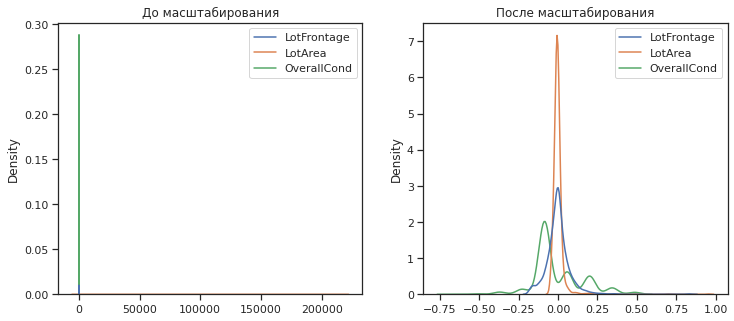

In [20]:
draw_kde(['LotFrontage', 'LotArea', 'OverallCond'], data, data_cs21_scaled, 'До масштабирования', 'После масштабирования')

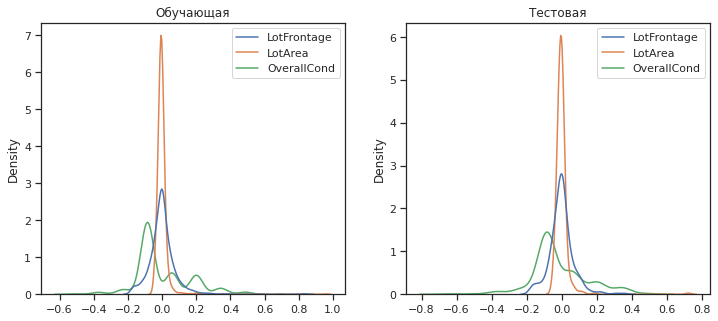

In [21]:
draw_kde(['LotFrontage', 'LotArea', 'OverallCond'], data_cs22_scaled_train, data_cs22_scaled_test, 'Обучающая', 'Тестовая')

## MinMax-масштабирование

In [22]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.167979,0.043080,0.566591,0.571918,0.719332,0.581096,0.064803,0.078604,0.031580,...,0.333554,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938
std,0.248827,0.075425,0.046653,0.153666,0.139100,0.218862,0.344090,0.113166,0.080811,0.109443,...,0.150779,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,...,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.167979,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,0.000000,...,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.198630,0.048150,0.666667,0.625000,0.927536,0.900000,0.103750,0.126196,0.000000,...,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

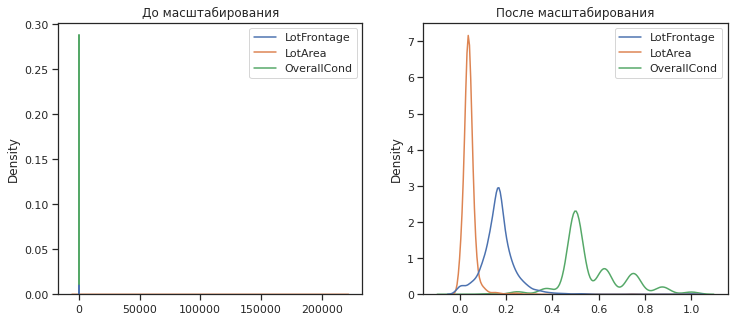

In [24]:
draw_kde(['LotFrontage', 'LotArea', 'OverallCond'], data, data_cs31_scaled, 'До масштабирования', 'После масштабирования')

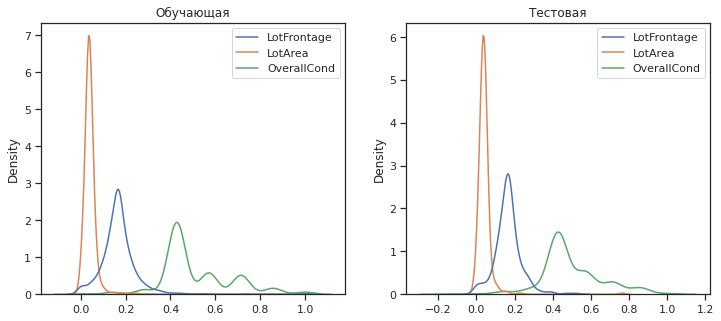

In [25]:
draw_kde(['LotFrontage', 'LotArea', 'OverallCond'], data_cs32_scaled_train, data_cs32_scaled_test, 'Обучающая', 'Тестовая')

## Обработка выбросов для числовых признаков

In [26]:
data2 = pd.read_csv("/content/drive/MyDrive/data/Car_sales.csv")

In [27]:
data2.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [28]:
data2.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [29]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

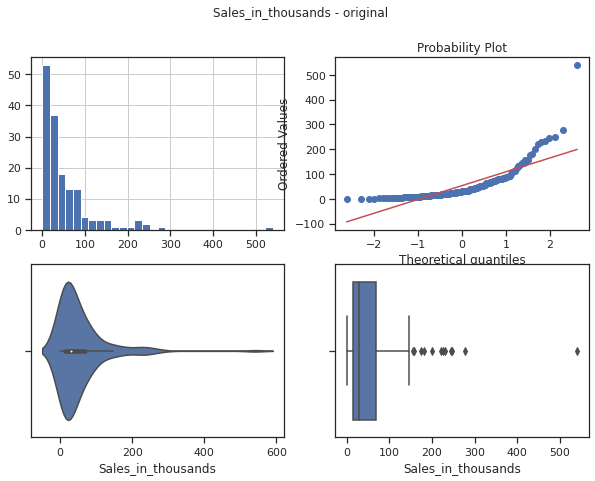

In [30]:
diagnostic_plots(data2, 'Sales_in_thousands', 'Sales_in_thousands - original')

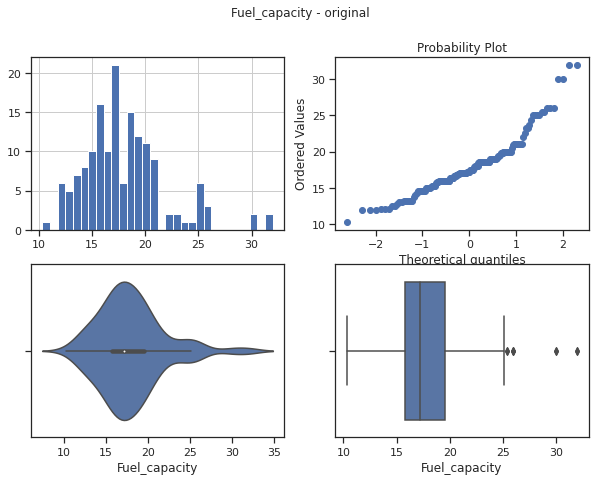

In [31]:
diagnostic_plots(data2, 'Fuel_capacity', 'Fuel_capacity - original')

In [32]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [33]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

## Удаление выбросов (number_of_reviews)

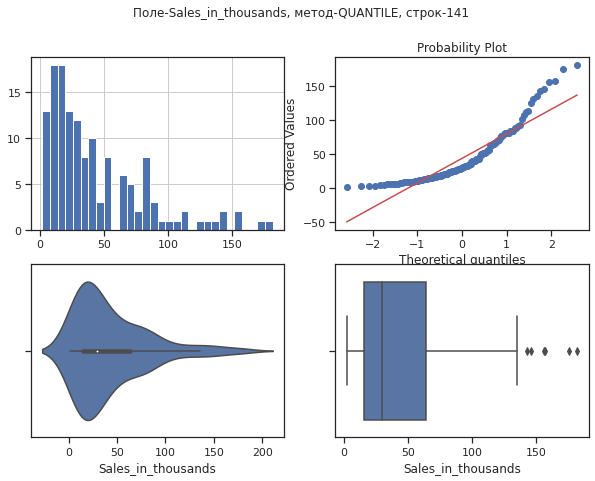

In [34]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Sales_in_thousands")
# Флаги для удаления выбросов
outliers_temp = np.where(data2["Sales_in_thousands"] > upper_boundary, True, 
                         np.where(data2["Sales_in_thousands"] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = data2.loc[~(outliers_temp), ]  
title = 'Поле-{}, метод-{}, строк-{}'.format("Sales_in_thousands", "QUANTILE", data_trimmed.shape[0])
diagnostic_plots(data_trimmed, "Sales_in_thousands", title)

## Замена выбросов

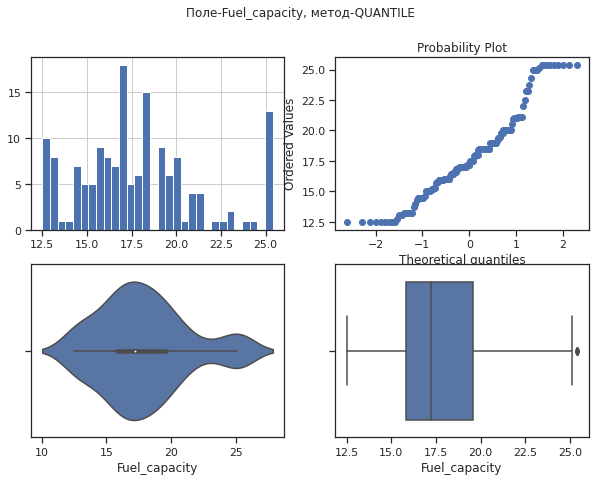

In [35]:
# Вычисление верхней и нижней границы
lower_boundary, upper_boundary = get_outlier_boundaries(data2, "Fuel_capacity")
# Изменение данных
data2["Fuel_capacity"] = np.where(data2["Fuel_capacity"] > upper_boundary, upper_boundary,
                     np.where(data2["Fuel_capacity"] < lower_boundary, lower_boundary, data2["Fuel_capacity"]))
title = 'Поле-{}, метод-{}'.format("Fuel_capacity", "QUANTILE")
diagnostic_plots(data2, "Fuel_capacity", title)

## Обработка нестандартного признака

In [36]:
data2.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [37]:
# Сконвертируем дату и время в нужный формат
data2["Latest_Launch_Date"] = data2.apply(lambda x: pd.to_datetime(x["Latest_Launch"], format='%m/%d/%Y'), axis=1)

In [38]:
data2.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Latest_Launch_Date
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,2012-02-02
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,2011-06-03
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN,2012-01-04
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,2011-03-10
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,2011-10-08


In [41]:
data2.dtypes

Manufacturer                   object
Model                          object
Sales_in_thousands            float64
__year_resale_value           float64
Vehicle_type                   object
Price_in_thousands            float64
Engine_size                   float64
Horsepower                    float64
Wheelbase                     float64
Width                         float64
Length                        float64
Curb_weight                   float64
Fuel_capacity                 float64
Fuel_efficiency               float64
Latest_Launch                  object
Power_perf_factor             float64
Latest_Launch_Date     datetime64[ns]
Latest_Launch_Day               int64
Latest_Launch_Month             int64
Latest_Launch_Year              int64
dtype: object

In [40]:
# День
data2['Latest_Launch_Day'] = data2['Latest_Launch_Date'].dt.day
# Месяц
data2['Latest_Launch_Month'] = data2['Latest_Launch_Date'].dt.month
# Год
data2['Latest_Launch_Year'] = data2['Latest_Launch_Date'].dt.year

## Отбор признаков

## Метод фильтрации (Корреляция признаков)

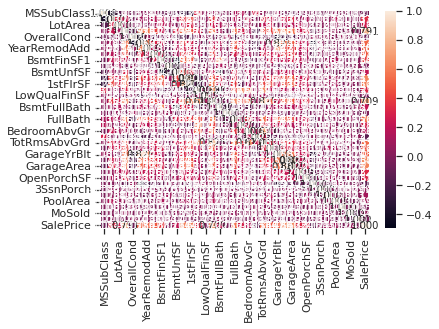

In [42]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [43]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [44]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [45]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['GarageArea',
  'SalePrice',
  'OverallQual',
  'GarageYrBlt',
  'YearBuilt',
  'FullBath',
  'GrLivArea',
  '1stFlrSF',
  'TotalBsmtSF',
  'YearRemodAdd',
  'MasVnrArea',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars'],
 ['GrLivArea',
  'TotRmsAbvGrd',
  'HalfBath',
  'BedroomAbvGr',
  'FullBath',
  'SalePrice',
  'MSSubClass',
  '2ndFlrSF'],
 ['BsmtFullBath',
  'TotalBsmtSF',
  'BsmtUnfSF',
  '1stFlrSF',
  'SalePrice',
  'BsmtFinSF1'],
 ['1stFlrSF',
  'GrLivArea',
  'TotalBsmtSF',
  'MSSubClass',
  'SalePrice',
  'GarageArea',
  'TotRmsAbvGrd',
  'LotArea',
  'LotFrontage'],
 ['YearBuilt', 'EnclosedPorch'],
 ['YearBuilt', 'GarageYrBlt', 'OverallCond'],
 ['GrLivArea', 'SalePrice', 'OverallQual', 'OpenPorchSF'],
 ['SalePrice', 'WoodDeckSF']]

## Метод из группы методов вложений

In [46]:
data3 = pd.read_csv("/content/drive/MyDrive/data/WineQT.csv", sep=",")

In [49]:
X3_ALL = data3.drop(['quality'], axis=1)

In [51]:
# Разделим выборку на обучающую и тестовую
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ALL, data3['quality'],
                                                    test_size=0.2,
                                                    random_state=1)

In [52]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 8.12685010e-01,  1.13666762e+01,  7.82623669e+00,
         2.73003859e-01,  2.20854445e+00, -8.14499398e-02,
        -6.07359291e-02, -9.71364320e+00,  1.05928330e+01,
        -3.02935401e+00, -3.49793957e+00,  4.48070237e-03],
       [-1.70947991e-02,  3.42135554e+00, -1.21007833e-01,
         8.32452278e-02,  3.20689559e+00,  1.03669460e-02,
        -1.25693925e-02, -5.18479271e+00,  2.46658035e+00,
         9.88462824e-01, -2.04766665e-01, -4.73535890e-04],
       [-1.50633685e-01,  1.93721323e+00,  1.12321685e+00,
         1.01141678e-02,  1.55206374e+00, -1.74615115e-02,
         1.48826890e-02,  5.10001726e+00, -2.81228295e-02,
        -2.62509731e+00, -9.26899115e-01,  5.26799951e-05],
       [ 1.90322225e-01, -1.79843954e+00, -2.04300613e+00,
        -4.72955643e-02,  2.58455381e+00,  1.21352411e-02,
        -7.83754176e-03, -2.99949432e+00,  9.79232831e-01,
         8.78802257e-01,  2.38635326e-01,  1.63131072e-04],
       [-2.89452663e-02, -3.07001091e+00,  1.4749051

In [54]:
# Все признаки являются "хорошими"
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X3_train, y3_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [56]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X3_train, y3_train)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.11590915e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.74405380e-02,  2.16195308e-05],
       [-3.25634884e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.53903186e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.09600420e-02, -7.57538218e-05],
       [ 5.38464273e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.01450282e-02,
         9.75002480e-03,  0.00000000e+00,  2.68720467e-01,
         0.00000000e+00, -1.39098820e-01,  6.67270806e-05],
       [-3.23150714e-03,  0.00000000e+00,  0.00000000e+00,
        -3.14484287e-03,  0.00000000e+00,  8.03406641e-03,
        -6.31251948e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.50594009e-05],
       [-3.14935119e-03,  0.00000000e+00,  0.0000000

In [58]:
# Признаки с флагом False д.б. исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X3_train, y3_train)
sel_e_lr2.get_support()

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True,  True])